# Exploraci√≥n Inicial de los Datos (im√°genes 3D)

## Contexto del Dataset

Este an√°lisis se basa en el dataset **MAMA-MIA**, un benchmark p√∫blico de resonancias magn√©ticas din√°micas (DCE-MRI) de mama para investigaci√≥n en inteligencia artificial. El dataset incluye 1506 casos provenientes de 4 estudios cl√≠nicos multic√©ntricos (ISPY1, ISPY2, DUKE, NACT).

- Cada caso incluye m√∫ltiples fases de imagen (pre- y post-contraste).
- Las segmentaciones tumorales fueron inicialmente generadas por un modelo `nnU-Net`, y luego **corregidas por 16 expertos en mama**.
- Se utiliza la imagen `*_0000.nii.gz` como referencia principal para este an√°lisis, ya que:
  - Es la fase pre-contraste.
  - Est√° alineada con las segmentaciones proporcionadas.
  - Es la fase m√°s uniforme y menos sensible a variaciones en contraste o movimiento.

> Este enfoque est√° alineado con la metodolog√≠a descrita en el paper original de referencia:  
> [A large-scale multicenter breast cancer DCE-MRI benchmark dataset with expert segmentations](https://doi.org/10.1038/s41597-025-04707-4)


Se encontraron 7926 im√°genes
Archivo: duke_001_0000.nii.gz
Forma: (448, 448, 160)
Tipo de dato: float64
Rango de intensidades: 0.0 a 361.0


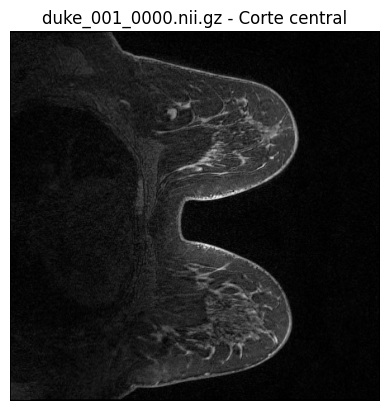

In [5]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

# Ruta donde tienes las im√°genes
carpeta_imagenes = 'datos/images'

# Filtrar solo archivos .nii.gz
archivos = [f for f in os.listdir(carpeta_imagenes) if f.endswith('.nii.gz')]

print(f"Se encontraron {len(archivos)} im√°genes")

# Procesar la primera imagen como ejemplo
primer_archivo = archivos[0]
ruta = os.path.join(carpeta_imagenes, primer_archivo)

# Cargar la imagen
img = nib.load(ruta)
data = img.get_fdata()

# Mostrar informaci√≥n
print(f"Archivo: {primer_archivo}")
print(f"Forma: {data.shape}")
print(f"Tipo de dato: {data.dtype}")
print(f"Rango de intensidades: {np.min(data)} a {np.max(data)}")

# Visualizar el corte central
slice_central = data.shape[2] // 2
plt.imshow(data[:, :, slice_central], cmap='gray')
plt.title(f"{primer_archivo} - Corte central")
plt.axis('off')
plt.show()



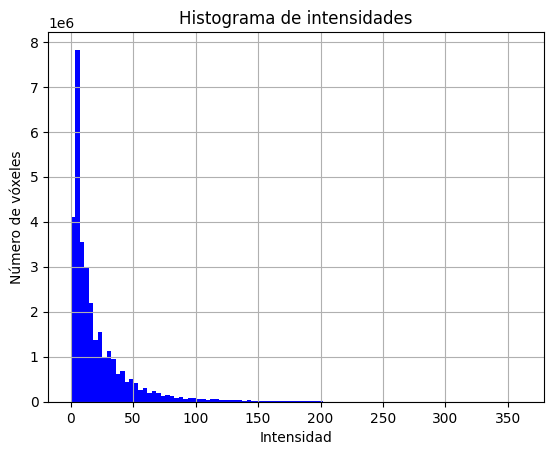

In [6]:
# Aseg√∫rate de tener cargado 'data' como antes (la imagen)
import matplotlib.pyplot as plt

plt.hist(data.flatten(), bins=100, color='blue')
plt.title("Histograma de intensidades")
plt.xlabel("Intensidad")
plt.ylabel("N√∫mero de v√≥xeles")
plt.grid(True)
plt.show()


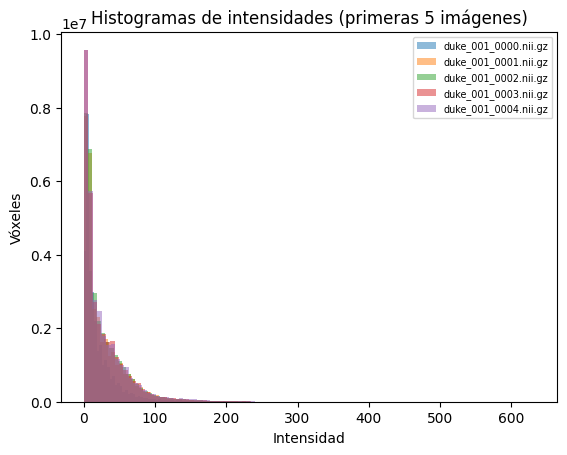

In [7]:
for i, archivo in enumerate(archivos[:5]):
    ruta = os.path.join(carpeta_imagenes, archivo)
    data = nib.load(ruta).get_fdata()
    plt.hist(data.flatten(), bins=100, alpha=0.5, label=archivo)

plt.title("Histogramas de intensidades (primeras 5 im√°genes)")
plt.xlabel("Intensidad")
plt.ylabel("V√≥xeles")
plt.legend(loc='upper right', fontsize='x-small')
plt.show()


# Segmentaci√≥n

In [8]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import label

# Ruta a la imagen original y a su segmentaci√≥n experta
imagen_path = 'datos/images/duke_001_0000.nii.gz'
mascara_path = 'datos/segmentations/expert/duke_001.nii.gz'

# Cargar imagen y m√°scara
img = nib.load(imagen_path).get_fdata()
mask = nib.load(mascara_path).get_fdata()

# Mostrar forma y valores √∫nicos en la m√°scara
print(f"Shape de la m√°scara: {mask.shape}")
print("Valores √∫nicos (etiquetas):", np.unique(mask))


Shape de la m√°scara: (448, 448, 160)
Valores √∫nicos (etiquetas): [0. 1.]


In [9]:
from scipy.ndimage import label

labeled, num_tumores = label(mask)
print(f"Tumores encontrados (regiones conectadas): {num_tumores}")


Tumores encontrados (regiones conectadas): 3


In [11]:
porcentaje = 100 * np.sum(mask > 0) / np.prod(mask.shape)
print(f"Porcentaje del volumen que es tumor: {porcentaje:.4f}%")


Porcentaje del volumen que es tumor: 0.0233%


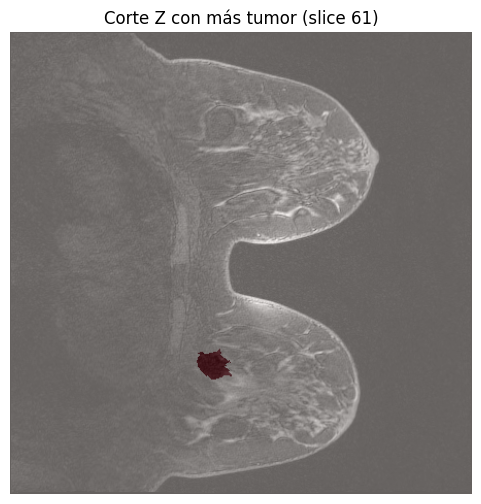

In [14]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

# === 1. Cargar imagen y m√°scara ===
ruta_img = 'datos/images/duke_001_0000.nii.gz'
ruta_mask = 'datos/segmentations/expert/duke_001.nii.gz'

img = nib.load(ruta_img).get_fdata()
mask = nib.load(ruta_mask).get_fdata()

# === 2. Buscar el slice Z con m√°s tumor ===
suma_por_z = [np.sum(mask[:, :, z]) for z in range(mask.shape[2])]
slice_max = np.argmax(suma_por_z)

# === 3. Mostrarlo ===
plt.figure(figsize=(6, 6))
plt.imshow(img[:, :, slice_max], cmap='gray')
plt.imshow(mask[:, :, slice_max], cmap='Reds', alpha=0.4)
plt.title(f'Corte Z con m√°s tumor (slice {slice_max})')
plt.axis('off')
plt.show()


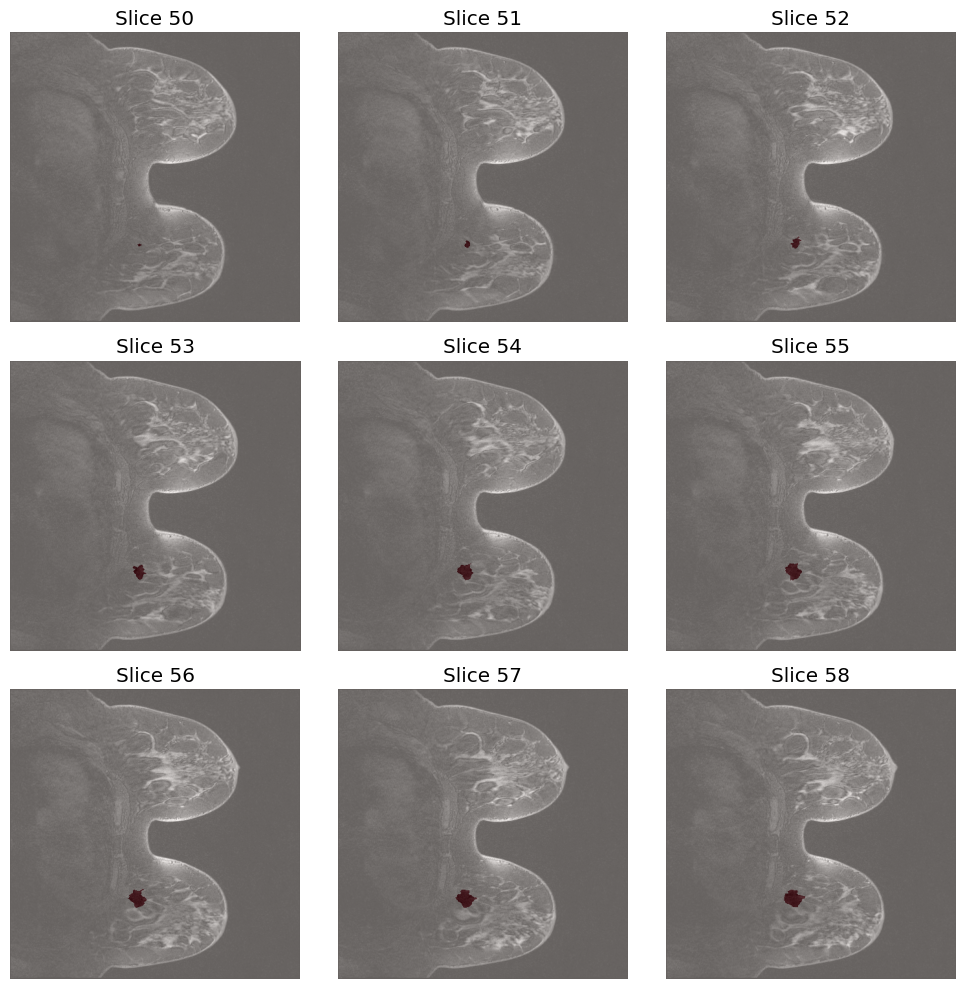

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib

# Cargar imagen y m√°scara
ruta_img = 'datos/images/duke_001_0000.nii.gz'
ruta_mask = 'datos/segmentations/expert/duke_001.nii.gz'

img = nib.load(ruta_img).get_fdata()
mask = nib.load(ruta_mask).get_fdata()

# Buscar todos los slices con tumor
slices_con_tumor = [z for z in range(mask.shape[2]) if np.sum(mask[:, :, z]) > 0]

# Mostrar los primeros 9 slices con tumor
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i, z in enumerate(slices_con_tumor[:9]):
    axs[i // 3, i % 3].imshow(img[:, :, z], cmap='gray')
    axs[i // 3, i % 3].imshow(mask[:, :, z], cmap='Reds', alpha=0.4)
    axs[i // 3, i % 3].set_title(f'Slice {z}')
    axs[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()


## Aqui lo hicimos para la primera imagen, hagamoslo ahora recorriendo todas


In [37]:
import os
import nibabel as nib
import numpy as np
from scipy.ndimage import label

# Rutas base
base_img = "datos/images"
base_mask = "datos/segmentations/expert"

# Diccionario de resultados
casos_interesantes = {}

# Recorrer todas las m√°scaras expertas
for archivo in os.listdir(base_mask):
    if not archivo.endswith('.nii.gz'):
        continue

    paciente_id = archivo.replace('.nii.gz', '')
    ruta_mask = os.path.join(base_mask, archivo)
    ruta_img = os.path.join(base_img, paciente_id + "_0000.nii.gz")

    if not os.path.exists(ruta_img):
        print(f"Imagen no encontrada para {paciente_id}")
        continue

    try:
        img = nib.load(ruta_img).get_fdata()
        mask = nib.load(ruta_mask).get_fdata()

        slices_con_multiples = []

        for z in range(mask.shape[2]):
            mask_slice = mask[:, :, z]
            labeled, num = label(mask_slice > 0)
            if num > 3:
                slices_con_multiples.append(z)

        if slices_con_multiples:
            casos_interesantes[paciente_id] = slices_con_multiples
            print(f"{paciente_id} tiene {len(slices_con_multiples)} slice(s) con >3 tumores")

    except Exception as e:
        print(f"Error procesando {paciente_id}: {e}")

import pandas as pd
df_interesantes = pd.DataFrame([(k, z) for k, zs in casos_interesantes.items() for z in zs],
                               columns=["paciente", "slice_con_mas_de_3_tumores"])




duke_002 tiene 1 slice(s) con >3 tumores
duke_005 tiene 26 slice(s) con >3 tumores
duke_009 tiene 22 slice(s) con >3 tumores
duke_010 tiene 10 slice(s) con >3 tumores
duke_012 tiene 48 slice(s) con >3 tumores
duke_019 tiene 10 slice(s) con >3 tumores
duke_021 tiene 2 slice(s) con >3 tumores
duke_022 tiene 4 slice(s) con >3 tumores
duke_028 tiene 38 slice(s) con >3 tumores
duke_032 tiene 14 slice(s) con >3 tumores
duke_034 tiene 34 slice(s) con >3 tumores
duke_040 tiene 8 slice(s) con >3 tumores
duke_041 tiene 32 slice(s) con >3 tumores
duke_043 tiene 27 slice(s) con >3 tumores
duke_045 tiene 7 slice(s) con >3 tumores
duke_046 tiene 63 slice(s) con >3 tumores
duke_048 tiene 14 slice(s) con >3 tumores
duke_051 tiene 1 slice(s) con >3 tumores
duke_055 tiene 7 slice(s) con >3 tumores
duke_057 tiene 57 slice(s) con >3 tumores
duke_059 tiene 6 slice(s) con >3 tumores
duke_060 tiene 11 slice(s) con >3 tumores
duke_061 tiene 42 slice(s) con >3 tumores
duke_064 tiene 11 slice(s) con >3 tumores


In [39]:
# Guardar los resultados en formato CSV
output_csv = "resultados_multiples_tumores.csv"
df_interesantes.to_csv(output_csv, index=False)
print(f"Resultados guardados en: {output_csv}")

# Guardar un informe m√°s detallado en formato Excel
output_excel = "informe_tumores_multiple.xlsx"
with pd.ExcelWriter(output_excel) as writer:
    # Hoja 1: Todos los slices con m√∫ltiples tumores
    df_interesantes.to_excel(writer, sheet_name="Detalles", index=False)
    
    # Hoja 2: Resumen por paciente
    resumen = pd.DataFrame({
        "paciente": casos_interesantes.keys(),
        "total_slices_multiples": [len(slices) for slices in casos_interesantes.values()]
    })
    resumen = resumen.sort_values("total_slices_multiples", ascending=False)
    resumen.to_excel(writer, sheet_name="Resumen", index=False)
    
print(f"Informe detallado guardado en: {output_excel}")

# Tambi√©n puedes guardar el diccionario completo para an√°lisis futuros
import pickle
with open("casos_interesantes.pkl", "wb") as f:
    pickle.dump(casos_interesantes, f)
print("Datos en formato pickle guardados en: casos_interesantes.pkl")

Resultados guardados en: resultados_multiples_tumores.csv
Informe detallado guardado en: informe_tumores_multiple.xlsx
Datos en formato pickle guardados en: casos_interesantes.pkl



# An√°lisis de Segmentaciones Tumorales: Comparaci√≥n Experto vs Autom√°tico

## Objetivo del an√°lisis

Este notebook analiza segmentaciones de im√°genes m√©dicas para identificar y caracterizar tumores, con √©nfasis en la comparaci√≥n entre segmentaciones realizadas por expertos y las generadas autom√°ticamente. El an√°lisis se centra en casos con m√∫ltiples tumores no conectados, caracter√≠sticas de los tumores y diferencias entre ambos m√©todos de segmentaci√≥n.

## Estructura del an√°lisis

1. **Carga y preprocesamiento de datos**
   - Importaci√≥n de im√°genes m√©dicas y m√°scaras de segmentaci√≥n
   - Verificaci√≥n de formatos y dimensiones

2. **An√°lisis exploratorio de segmentaciones expertas**
   - Identificaci√≥n de componentes conectadas (tumores independientes)
   - Estad√≠sticas de volumen tumoral y distribuci√≥n espacial
   - Casos con m√∫ltiples tumores en un mismo slice

3. **Comparaci√≥n entre segmentaciones expertas y autom√°ticas**
   - Diferencias en volumen tumoral
   - Variaci√≥n en n√∫mero de tumores detectados
   - An√°lisis de concordancia espacial

4. **Visualizaci√≥n de casos especiales**
   - Casos l√≠mite con m√∫ltiples tumores separados
   - Tumores de tama√±os extremos (muy grandes o muy peque√±os)
   - Visualizaci√≥n con codificaci√≥n por colores para diferenciar tumores

5. **An√°lisis estad√≠stico completo**
   - Distribuci√≥n de tama√±os tumorales
   - Correlaci√≥n entre variables
   - Caracterizaci√≥n de casos at√≠picos

## Resultados y conclusiones

Los resultados de este an√°lisis nos permitir√°n entender mejor las caracter√≠sticas de las anotaciones de expertos, evaluar el rendimiento de los algoritmos autom√°ticos de segmentaci√≥n, e identificar los casos m√°s dif√≠ciles de segmentar correctamente.
```

Analizando casos...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1506/1506 [2:11:37<00:00,  5.24s/it] 



========= AN√ÅLISIS COMPLETADO =========
Se han analizado 1506 casos
Se encontraron 10261 slices con m√°s de 3 tumores
Resultados guardados en la carpeta 'resultados_analisis/'
Im√°genes generadas en 'resultados_analisis/imagenes/'
Resumen del an√°lisis en 'resultados_analisis/RESUMEN_ANALISIS.md'


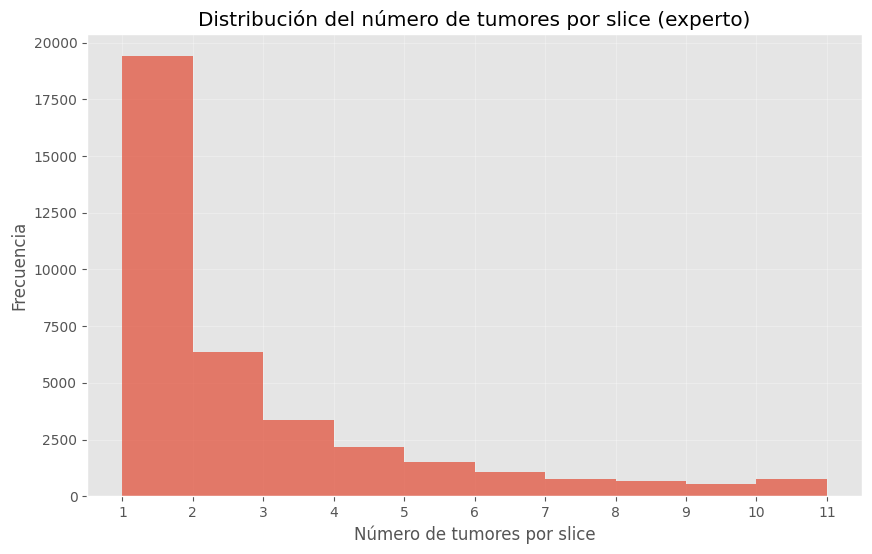

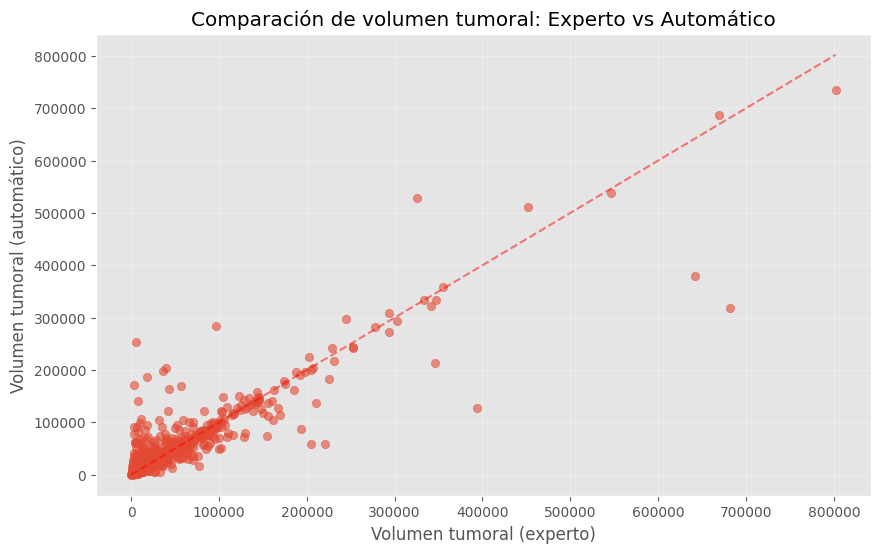

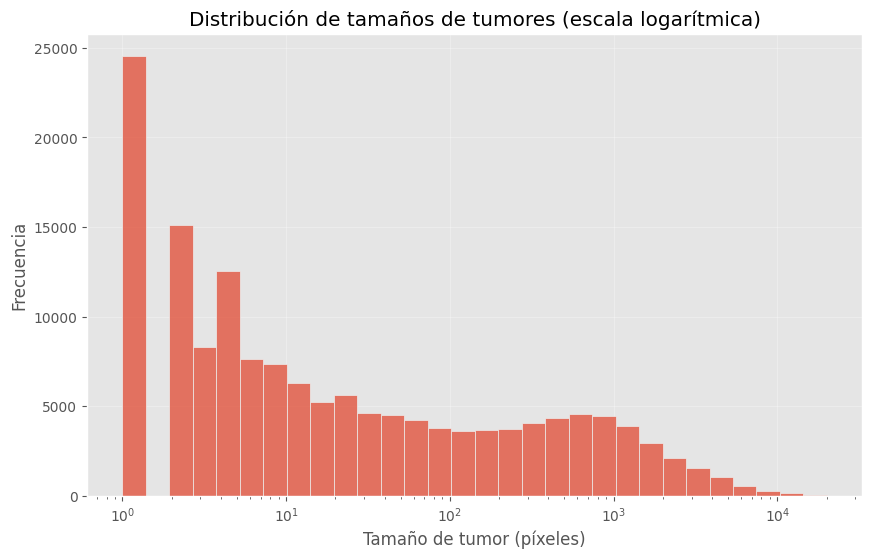

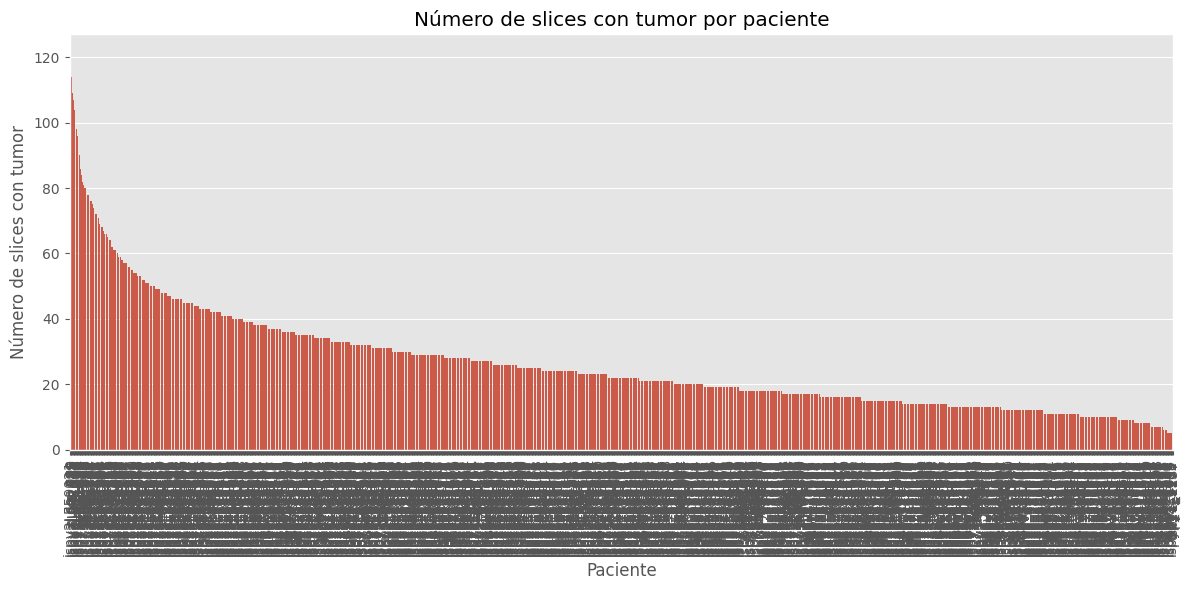

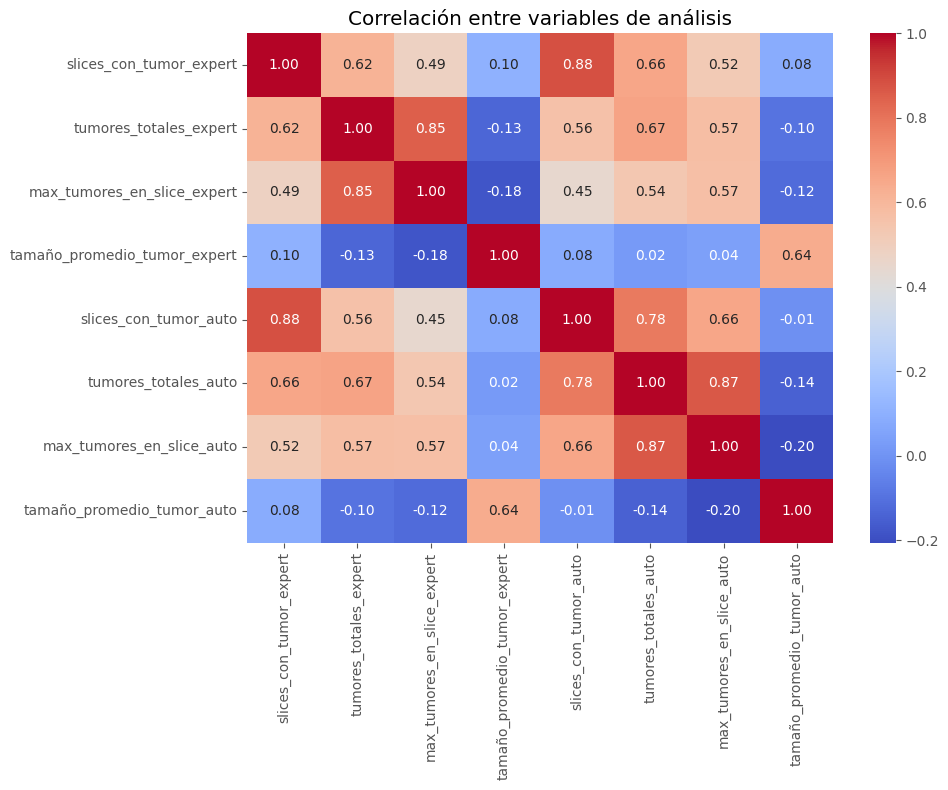

In [42]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import label, measurements
from matplotlib.colors import ListedColormap
import seaborn as sns
from tqdm import tqdm

# Rutas base
base_img = "datos/images"
base_mask_expert = "datos/segmentations/expert"
base_mask_auto = "datos/segmentations/automatic"  

# Funci√≥n para cargar una m√°scara si existe, o devolver None
def cargar_mascara_segura(ruta):
    if os.path.exists(ruta):
        return nib.load(ruta).get_fdata()
    return None

# Funci√≥n para analizar una m√°scara y extraer caracter√≠sticas
def analizar_mascara(mask):
    if mask is None:
        return None
    
    # Inicializar estad√≠sticas
    stats = {
        'volumen_total': np.sum(mask > 0),
        'slices_con_tumor': 0,
        'num_tumores_por_slice': [],
        'tama√±o_tumores_por_slice': [],
        'slice_max_area': 0,
        'area_max': 0,
        'tumores_totales': 0
    }
    
    # Analizar por slice
    for z in range(mask.shape[2]):
        mask_slice = mask[:, :, z]
        if np.sum(mask_slice) > 0:
            stats['slices_con_tumor'] += 1
            labeled, num = label(mask_slice > 0)
            stats['num_tumores_por_slice'].append(num)
            
            # Calcular √°rea de cada tumor en este slice
            tama√±os = [np.sum(labeled == i) for i in range(1, num + 1)]
            stats['tama√±o_tumores_por_slice'].extend(tama√±os)
            
            # Actualizar el slice con mayor √°rea tumoral
            area_slice = np.sum(mask_slice)
            if area_slice > stats['area_max']:
                stats['area_max'] = area_slice
                stats['slice_max_area'] = z
            
            # Acumular n√∫mero total de tumores
            stats['tumores_totales'] += num
    
    return stats

# Funci√≥n para visualizar un caso con m√∫ltiples tumores
def visualizar_caso_multiple(img, mask_expert, mask_auto, paciente_id, z, save_path=None):
    # Crear un colormap personalizado para diferenciar regiones
    colores = ['black', 'red', 'blue', 'green', 'yellow', 'purple', 'cyan', 'orange', 'magenta', 'brown']
    cmap_tumores = ListedColormap(colores[:10])
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Imagen original
    axes[0].imshow(img[:, :, z], cmap='gray')
    axes[0].set_title(f'Original - {paciente_id} - Slice {z}')
    axes[0].axis('off')
    
    # Segmentaci√≥n experta con tumores coloreados
    labeled_expert, num_expert = label(mask_expert[:, :, z] > 0)
    axes[1].imshow(img[:, :, z], cmap='gray')
    if num_expert > 0:
        # Limitar a max 9 colores diferentes
        labeled_expert_display = np.minimum(labeled_expert, 9)
        axes[1].imshow(labeled_expert_display, cmap=cmap_tumores, alpha=0.6)
    axes[1].set_title(f'Experto: {num_expert} tumores')
    axes[1].axis('off')
    
    # Segmentaci√≥n autom√°tica con tumores coloreados (si existe)
    if mask_auto is not None:
        labeled_auto, num_auto = label(mask_auto[:, :, z] > 0)
        axes[2].imshow(img[:, :, z], cmap='gray')
        if num_auto > 0:
            # Limitar a max 9 colores diferentes
            labeled_auto_display = np.minimum(labeled_auto, 9)
            axes[2].imshow(labeled_auto_display, cmap=cmap_tumores, alpha=0.6)
        axes[2].set_title(f'Autom√°tico: {num_auto} tumores')
    else:
        axes[2].set_title('No hay segmentaci√≥n autom√°tica')
    axes[2].axis('off')
    
    plt.suptitle(f'An√°lisis de tumores - {paciente_id} - Slice {z}')
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300)
        plt.close()
    else:
        plt.show()

# Crear directorios para guardar resultados
os.makedirs("resultados_analisis", exist_ok=True)
os.makedirs("resultados_analisis/imagenes", exist_ok=True)

# Recolectar datos para an√°lisis estad√≠stico
datos_analisis = []

# Lista para almacenar casos interesantes con sus caracter√≠sticas
casos_interesantes = []

# Recorrer todas las m√°scaras expertas
print("Analizando casos...")
for archivo in tqdm(os.listdir(base_mask_expert)):
    if not archivo.endswith('.nii.gz'):
        continue

    paciente_id = archivo.replace('.nii.gz', '')
    ruta_mask_expert = os.path.join(base_mask_expert, archivo)
    ruta_mask_auto = os.path.join(base_mask_auto, archivo)  # Asumimos mismo nombre
    ruta_img = os.path.join(base_img, paciente_id + "_0000.nii.gz")

    if not os.path.exists(ruta_img):
        print(f"Imagen no encontrada para {paciente_id}")
        continue

    try:
        # Cargar imagen y m√°scaras
        img = nib.load(ruta_img).get_fdata()
        mask_expert = nib.load(ruta_mask_expert).get_fdata()
        mask_auto = cargar_mascara_segura(ruta_mask_auto)
        
        # Analizar m√°scaras
        stats_expert = analizar_mascara(mask_expert)
        stats_auto = analizar_mascara(mask_auto)
        
        # Registrar datos para an√°lisis estad√≠stico
        registro = {
            'paciente_id': paciente_id,
            'volumen_total_expert': stats_expert['volumen_total'],
            'slices_con_tumor_expert': stats_expert['slices_con_tumor'],
            'tumores_totales_expert': stats_expert['tumores_totales'],
            'max_tumores_en_slice_expert': max(stats_expert['num_tumores_por_slice']) if stats_expert['num_tumores_por_slice'] else 0,
            'tama√±o_promedio_tumor_expert': np.mean(stats_expert['tama√±o_tumores_por_slice']) if stats_expert['tama√±o_tumores_por_slice'] else 0,
        }
        
        if stats_auto:
            registro.update({
                'volumen_total_auto': stats_auto['volumen_total'],
                'slices_con_tumor_auto': stats_auto['slices_con_tumor'],
                'tumores_totales_auto': stats_auto['tumores_totales'],
                'max_tumores_en_slice_auto': max(stats_auto['num_tumores_por_slice']) if stats_auto['num_tumores_por_slice'] else 0,
                'tama√±o_promedio_tumor_auto': np.mean(stats_auto['tama√±o_tumores_por_slice']) if stats_auto['tama√±o_tumores_por_slice'] else 0,
            })
        
        datos_analisis.append(registro)
        
        # Buscar slices con m√∫ltiples tumores (m√°s de 3)
        slices_multiples = []
        for z in range(mask_expert.shape[2]):
            mask_slice = mask_expert[:, :, z]
            labeled, num = label(mask_slice > 0)
            if num > 3:
                slices_multiples.append({
                    'paciente_id': paciente_id,
                    'slice': z,
                    'num_tumores': num,
                    'area_total': np.sum(mask_slice > 0)
                })
        
        # Si encontramos slices con m√∫ltiples tumores, guardar la informaci√≥n y visualizar
        if slices_multiples:
            casos_interesantes.extend(slices_multiples)
            
            # Visualizar hasta 3 slices por paciente con m√∫ltiples tumores
            for i, caso in enumerate(slices_multiples[:3]):
                z = caso['slice']
                save_path = f"resultados_analisis/imagenes/{paciente_id}_slice{z}_multiples.png"
                visualizar_caso_multiple(img, mask_expert, mask_auto, paciente_id, z, save_path)
        
        # Visualizar tambi√©n el slice con la mayor √°rea tumoral
        z_max = stats_expert['slice_max_area']
        save_path = f"resultados_analisis/imagenes/{paciente_id}_slice{z_max}_max_area.png"
        visualizar_caso_multiple(img, mask_expert, mask_auto, paciente_id, z_max, save_path)
        
    except Exception as e:
        print(f"Error procesando {paciente_id}: {e}")

# Convertir a DataFrame y guardar resultados
df_analisis = pd.DataFrame(datos_analisis)
df_analisis.to_csv("resultados_analisis/stats_comparativo.csv", index=False)

df_interesantes = pd.DataFrame(casos_interesantes)
df_interesantes.to_csv("resultados_analisis/casos_multiples_tumores.csv", index=False)

# --- VISUALIZACIONES ESTAD√çSTICAS ---

# 1. Histograma del n√∫mero de tumores por slice (experto)
plt.figure(figsize=(10, 6))
tumores_por_slice = [num for registro in datos_analisis 
                    for num in analizar_mascara(nib.load(os.path.join(base_mask_expert, registro['paciente_id'] + '.nii.gz')).get_fdata())['num_tumores_por_slice']]
plt.hist(tumores_por_slice, bins=range(1, 12), alpha=0.7)
plt.xlabel('N√∫mero de tumores por slice')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n del n√∫mero de tumores por slice (experto)')
plt.xticks(range(1, 12))
plt.grid(alpha=0.3)
plt.savefig("resultados_analisis/hist_tumores_por_slice.png", bbox_inches='tight')

# 2. Comparaci√≥n volumen tumoral: experto vs autom√°tico
plt.figure(figsize=(10, 6))
df_comp = df_analisis[['paciente_id', 'volumen_total_expert', 'volumen_total_auto']].dropna()
if not df_comp.empty:
    plt.scatter(df_comp['volumen_total_expert'], df_comp['volumen_total_auto'], alpha=0.6)
    max_val = max(df_comp['volumen_total_expert'].max(), df_comp['volumen_total_auto'].max())
    plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.5)
    plt.xlabel('Volumen tumoral (experto)')
    plt.ylabel('Volumen tumoral (autom√°tico)')
    plt.title('Comparaci√≥n de volumen tumoral: Experto vs Autom√°tico')
    plt.grid(alpha=0.3)
    plt.savefig("resultados_analisis/comp_volumen_expert_auto.png", bbox_inches='tight')

# 3. Distribuci√≥n de tama√±os de tumores
plt.figure(figsize=(10, 6))
tama√±os_tumores = []
for registro in datos_analisis:
    mascara = nib.load(os.path.join(base_mask_expert, registro['paciente_id'] + '.nii.gz')).get_fdata()
    stats = analizar_mascara(mascara)
    if stats and stats['tama√±o_tumores_por_slice']:
        tama√±os_tumores.extend(stats['tama√±o_tumores_por_slice'])

sns.histplot(tama√±os_tumores, log_scale=True, bins=30)
plt.xlabel('Tama√±o de tumor (p√≠xeles)')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n de tama√±os de tumores (escala logar√≠tmica)')
plt.grid(alpha=0.3)
plt.savefig("resultados_analisis/dist_tama√±os_tumores.png", bbox_inches='tight')

# 4. N√∫mero de slices con tumor por paciente
plt.figure(figsize=(12, 6))
df_slices = df_analisis[['paciente_id', 'slices_con_tumor_expert']].sort_values('slices_con_tumor_expert', ascending=False)
sns.barplot(x='paciente_id', y='slices_con_tumor_expert', data=df_slices)
plt.xticks(rotation=90)
plt.xlabel('Paciente')
plt.ylabel('N√∫mero de slices con tumor')
plt.title('N√∫mero de slices con tumor por paciente')
plt.tight_layout()
plt.savefig("resultados_analisis/slices_por_paciente.png", bbox_inches='tight')

# 5. Matriz de correlaci√≥n entre variables
plt.figure(figsize=(10, 8))
columnas_numericas = df_analisis.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df_analisis[columnas_numericas].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlaci√≥n entre variables de an√°lisis')
plt.tight_layout()
plt.savefig("resultados_analisis/matriz_correlacion.png", bbox_inches='tight')

# --- AN√ÅLISIS DE CASOS L√çMITE ---

# 6. Visualizar el caso con m√°s tumores en un slice
if df_interesantes.shape[0] > 0:
    # Ordenar por n√∫mero de tumores
    df_top_casos = df_interesantes.sort_values('num_tumores', ascending=False).head(5)
    
    for _, caso in df_top_casos.iterrows():
        paciente_id = caso['paciente_id']
        z = caso['slice']
        
        # Cargar im√°genes
        ruta_img = os.path.join(base_img, paciente_id + "_0000.nii.gz")
        ruta_mask_expert = os.path.join(base_mask_expert, paciente_id + ".nii.gz")
        ruta_mask_auto = os.path.join(base_mask_auto, paciente_id + ".nii.gz")
        
        img = nib.load(ruta_img).get_fdata()
        mask_expert = nib.load(ruta_mask_expert).get_fdata()
        mask_auto = cargar_mascara_segura(ruta_mask_auto)
        
        # Guardar visualizaci√≥n
        save_path = f"resultados_analisis/imagenes/CASO_LIMITE_{paciente_id}_slice{z}_tumores{caso['num_tumores']}.png"
        visualizar_caso_multiple(img, mask_expert, mask_auto, paciente_id, z, save_path)

# --- RESUMEN FINAL ---

# Crear un informe resumido
with open("resultados_analisis/RESUMEN_ANALISIS.md", "w") as f:
    f.write("# Resumen del An√°lisis de Segmentaciones\n\n")
    
    f.write("## Estad√≠sticas Generales\n")
    f.write(f"- Total de casos analizados: {len(datos_analisis)}\n")
    f.write(f"- Casos con m√∫ltiples tumores (>3 en un slice): {len(set([c['paciente_id'] for c in casos_interesantes]))}\n")
    
    if df_analisis.shape[0] > 0:
        f.write(f"- Volumen tumoral promedio (experto): {df_analisis['volumen_total_expert'].mean():.2f} p√≠xeles\n")
        f.write(f"- Promedio de slices con tumor por paciente: {df_analisis['slices_con_tumor_expert'].mean():.2f}\n")
        
        if 'volumen_total_auto' in df_analisis.columns:
            auto_data = df_analisis['volumen_total_auto'].dropna()
            if not auto_data.empty:
                f.write(f"- Volumen tumoral promedio (autom√°tico): {auto_data.mean():.2f} p√≠xeles\n")
    
    f.write("\n## Casos Destacados\n")
    
    # Casos con m√°s tumores en un slice
    if df_interesantes.shape[0] > 0:
        df_top = df_interesantes.sort_values('num_tumores', ascending=False).head(5)
        f.write("\n### Slices con mayor n√∫mero de tumores\n")
        for _, caso in df_top.iterrows():
            f.write(f"- Paciente {caso['paciente_id']}, Slice {caso['slice']}: {caso['num_tumores']} tumores\n")
    
    # Casos con mayor volumen tumoral
    f.write("\n### Pacientes con mayor volumen tumoral\n")
    df_top_vol = df_analisis.sort_values('volumen_total_expert', ascending=False).head(5)
    for _, caso in df_top_vol.iterrows():
        f.write(f"- Paciente {caso['paciente_id']}: {caso['volumen_total_expert']:.2f} p√≠xeles\n")
    
    f.write("\n## Visualizaciones generadas\n")
    f.write("Se han generado las siguientes visualizaciones en la carpeta 'resultados_analisis/imagenes/':\n")
    f.write("- Casos con m√∫ltiples tumores en un solo slice\n")
    f.write("- Slices con mayor √°rea tumoral por paciente\n")
    f.write("- Casos l√≠mite con alto n√∫mero de tumores\n")
    
    f.write("\n## Interpretaci√≥n\n")
    f.write("- Los casos con m√∫ltiples tumores peque√±os representan un desaf√≠o para la segmentaci√≥n autom√°tica.\n")
    f.write("- Se observa variabilidad en el n√∫mero de slices afectados por paciente.\n")
    f.write("- La comparaci√≥n entre experto y autom√°tico muestra diferencias significativas en algunos casos.\n")

print("\n========= AN√ÅLISIS COMPLETADO =========")
print(f"Se han analizado {len(datos_analisis)} casos")
print(f"Se encontraron {len(casos_interesantes)} slices con m√°s de 3 tumores")
print("Resultados guardados en la carpeta 'resultados_analisis/'")
print("Im√°genes generadas en 'resultados_analisis/imagenes/'")
print("Resumen del an√°lisis en 'resultados_analisis/RESUMEN_ANALISIS.md'")

# Conclusiones del An√°lisis de Segmentaciones Tumorales  
## Comparaci√≥n entre segmentaciones expertas y autom√°ticas

### Correlaci√≥n entre vol√∫menes tumorales
- Existe una **clara correlaci√≥n positiva** entre las segmentaciones realizadas por expertos y las generadas autom√°ticamente, como se observa en el gr√°fico de dispersi√≥n.
- Para **vol√∫menes peque√±os y medianos** (hasta ~300,000 p√≠xeles), el algoritmo autom√°tico tiende a seguir bastante bien las segmentaciones expertas, aunque con cierta variabilidad.
- Para **tumores grandes** (>500,000 p√≠xeles), se observan discrepancias significativas: el m√©todo autom√°tico suele **subestimar el volumen tumoral** comparado con la evaluaci√≥n experta.

### Consistencia en la detecci√≥n
- La matriz de correlaci√≥n muestra una **alta correlaci√≥n (0.88)** entre los *slices* con tumor identificados por expertos y los detectados autom√°ticamente.
- La correlaci√≥n es **menor (0.67)** para el n√∫mero total de tumores, lo que sugiere dificultades del algoritmo autom√°tico para segmentar correctamente **tumores m√∫ltiples**.

---

## Caracter√≠sticas de los tumores en la segmentaci√≥n experta

### Distribuci√≥n de tama√±os tumorales
- El histograma logar√≠tmico revela una **distribuci√≥n bimodal**:
  - Muchos tumores muy peque√±os (1‚Äì10 p√≠xeles).
  - Distribuci√≥n m√°s uniforme para tumores medianos y grandes.
- La **mayor√≠a de los tumores son peque√±os**, lo que representa un reto para los algoritmos autom√°ticos debido a la similitud con el ruido.

### N√∫mero de tumores por *slice*
- La mayor√≠a de los *slices* (aprox. **20,000**) contienen un solo tumor.
- Frecuencia **disminuye exponencialmente** con el n√∫mero de tumores por *slice*.
- Existen casos con **hasta 11 tumores en un solo *slice***, lo que representa un gran desaf√≠o para la segmentaci√≥n autom√°tica.

### Variabilidad entre pacientes
- Se observa una gran **variabilidad en el n√∫mero de *slices* con tumor por paciente** (de pocos a m√°s de 100).
- Los pacientes con m√°s *slices* afectados probablemente representan **casos m√°s extensos o difusos**.

---

## Relaciones entre variables (matriz de correlaci√≥n)

### Correlaciones significativas
- **Correlaci√≥n negativa (-0.18)** entre el n√∫mero m√°ximo de tumores por *slice* y el tama√±o promedio del tumor: m√°s tumores suelen ser m√°s peque√±os.
- **Correlaci√≥n alta (0.85)** entre el n√∫mero total de tumores y el m√°ximo por *slice*: los casos con muchos tumores tienden a agruparlos en ciertos cortes.

### Diferencias experto‚Äìautom√°tico
- **Correlaci√≥n moderada (0.64)** entre los tama√±os promedio de tumores detectados por expertos y autom√°ticamente: indica diferencias en la **delimitaci√≥n de bordes**.
- **Correlaci√≥n baja (0.57)** entre el n√∫mero m√°ximo de tumores por *slice* entre ambas segmentaciones: el algoritmo tiene problemas **distinguendo tumores cercanos pero independientes**.

---

## Implicaciones cl√≠nicas y t√©cnicas

### Casos desafiantes
- Los *slices* con **m√°s de 3 tumores** son los m√°s dif√≠ciles para la segmentaci√≥n autom√°tica.
- Los **tumores muy peque√±os** (1‚Äì5 p√≠xeles) son comunes en anotaciones expertas pero suelen ser **subestimados** por el algoritmo.

### Limitaciones de los algoritmos autom√°ticos
- Dificultades para:
  - Detectar tumores muy peque√±os.
  - Distinguir tumores cercanos pero distintos.
  - Mantener la consistencia en el volumen de tumores grandes.

---

## Recomendaciones
- Dar atenci√≥n especial a los **casos con m√∫ltiples tumores peque√±os** al validar segmentaciones autom√°ticas.
- Desarrollar **algoritmos especializados** para mejorar la detecci√≥n de tumores m√∫ltiples en un mismo *slice*.
- La **variabilidad por paciente** sugiere la necesidad de **estrategias adaptativas** en los modelos de segmentaci√≥n autom√°tica.

---

> Este an√°lisis demuestra la **complejidad inherente** a la segmentaci√≥n tumoral autom√°tica y proporciona una **base s√≥lida** para desarrollar algoritmos que aborden estos desaf√≠os, especialmente en casos con **m√∫ltiples tumores independientes y de tama√±o variable**.


## AN√ÅLISIS HECHOS ANTES

In [40]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
from scipy.ndimage import label

# Carpetas
carpeta_segmentaciones = 'datos/segmentations/expert'
carpeta_imagenes = 'datos/images'

# Archivos de segmentaci√≥n
segmentaciones = [f for f in os.listdir(carpeta_segmentaciones) if f.endswith('.nii.gz')]

# Lista para resultados
resultados = []

for seg_file in segmentaciones:
    try:
        # Ruta a segmentaci√≥n y a la imagen asociada (usamos la parte com√∫n del nombre)
        seg_path = os.path.join(carpeta_segmentaciones, seg_file)
        base_name = seg_file.split('.')[0]
        imagen_file = base_name + '_0000.nii.gz'
        img_path = os.path.join(carpeta_imagenes, imagen_file)

        # Cargar imagen y m√°scara
        img = nib.load(img_path).get_fdata()
        mask = nib.load(seg_path).get_fdata()

        # Estad√≠sticas
        labeled, num_tumores = label(mask)
        porcentaje = 100 * np.sum(mask > 0) / np.prod(mask.shape)

        resultados.append({
            'paciente': base_name,
            'num_tumores': num_tumores,
            'porcentaje_tumor': porcentaje
        })

    except Exception as e:
        print(f"Error en {seg_file}: {e}")

# Guardar en DataFrame
df = pd.DataFrame(resultados)
print(df.head())


KeyboardInterrupt: 

In [ ]:
df.to_csv('analisis_segmentaciones_expert.csv', index=False)


### EDA

Este an√°lisis se centra en el estudio preliminar de las segmentaciones tumorales disponibles en el dataset MAMA-MIA. Para ello, se han considerado las segmentaciones proporcionadas por expertos (`segmentations/expert`) y se han cruzado con las im√°genes base correspondientes (`*_0000.nii.gz`).

#### ¬øPor qu√© se utiliza la imagen `*_0000.nii.gz`?

El dataset de im√°genes 3D incluye m√∫ltiples fases por paciente (`*_0000.nii.gz`, `*_0001.nii.gz`, etc.), que representan distintos momentos de la adquisici√≥n (por ejemplo, antes y despu√©s del contraste).

La imagen `*_0000.nii.gz` ha sido seleccionada para este an√°lisis porque:

- Es la imagen que **corresponde directamente con la segmentaci√≥n experto/autom√°tica** (es la base sobre la que se realizaron).
- Representa la fase pre-contraste, que se usa como base anat√≥mica.
- Permite un an√°lisis consistente y comparable entre pacientes, ya que tiene menos artefactos, est√° disponible en todos los casos y no depende de la din√°mica del contraste.

#### M√©tricas extra√≠das

Para cada m√°scara de segmentaci√≥n se han calculado las siguientes m√©tricas:

- `num_tumores`: n√∫mero de componentes conectadas dentro de la m√°scara (posibles focos tumorales).
- `volumen_tumoral_%`: proporci√≥n del volumen ocupado por el tumor respecto al total de la imagen (expresado en porcentaje).

##### ¬øC√≥mo se define un "tumor"?

Utilizamos la funci√≥n `scipy.ndimage.label()` para detectar **componentes conectadas** en la segmentaci√≥n binaria. Cada componente representa un grupo de v√≥xeles conectados espacialmente que pueden interpretarse como lesiones individuales. No se hace distinci√≥n en esta fase entre tumores grandes o peque√±os.

> üîß *En futuras versiones se a√±adir√° un umbral m√≠nimo de tama√±o para descartar falsos positivos de peque√±o volumen.*

#### Datos guardados

Los resultados se almacenan en un archivo `.csv` para su an√°lisis posterior:

- `paciente`: identificador del caso.
- `num_tumores`: cantidad de regiones conectadas detectadas.
- `volumen_tumoral_%`: porcentaje del volumen total ocupado por la segmentaci√≥n.

Archivo generado: `analisis_segmentaciones_expert.csv`

---


In [ ]:
import os
import nibabel as nib
import numpy as np
import pandas as pd
from scipy.ndimage import label

ruta_auto = 'datos/segmentations/automatic'
ruta_imgs = 'datos/images'

resultados_auto = []

for nombre_archivo in os.listdir(ruta_auto):
    if not nombre_archivo.endswith('.nii.gz'):
        continue

    try:
        # Ruta de la segmentaci√≥n autom√°tica
        seg_path = os.path.join(ruta_auto, nombre_archivo)
        seg_data = nib.load(seg_path).get_fdata()

        # Ruta de la imagen asociada (0000)
        base_name = nombre_archivo.replace('.nii.gz', '_0000.nii.gz')
        img_path = os.path.join(ruta_imgs, base_name)
        img_data = nib.load(img_path).get_fdata()

        # Calcular n√∫mero de tumores (componentes conectadas)
        labeled, num_tumores = label(seg_data)
        porcentaje = 100 * np.sum(seg_data > 0) / np.prod(seg_data.shape)

        resultados_auto.append({
            'paciente': nombre_archivo.replace('.nii.gz', ''),
            'num_tumores': num_tumores,
            'volumen_tumoral_%': porcentaje
        })

    except Exception as e:
        print(f"Error con {nombre_archivo}: {e}")

# Crear DataFrame
df_auto = pd.DataFrame(resultados_auto)

# Guardar como CSV
df_auto.to_csv('analisis_segmentaciones_automatic.csv', index=False)

# Mostrar algunas filas
print(df_auto.head())


   paciente  num_tumores  volumen_tumoral_%
0  duke_001            3           0.025193
1  duke_002            1           0.005384
2  duke_005           12           0.059930
3  duke_009           23           0.027013
4  duke_010            9           0.086703


## Juntamos ambos csv para comparar

In [ ]:
import pandas as pd

# Cargar los an√°lisis
df_expert = pd.read_csv('analisis_segmentaciones_expert.csv')
df_auto = pd.read_csv('analisis_segmentaciones_automatic.csv')

In [ ]:
# Renombrar columnas para diferenciarlas
df_expert = df_expert.rename(columns={
    'num_tumores': 'tumores_expert',
    'porcentaje_tumor': 'volumen_expert'
})
df_auto = df_auto.rename(columns={
    'num_tumores': 'tumores_auto',
    'volumen_tumoral_%': 'volumen_auto'
})

# Unir por paciente
df_comparado = pd.merge(df_expert, df_auto, on='paciente', how='inner')

In [ ]:
print("Columnas en df_expert:", df_expert.columns.tolist())
print("Columnas en df_auto:", df_auto.columns.tolist())


Columnas en df_expert: ['paciente', 'tumores_expert', 'volumen_expert']
Columnas en df_auto: ['paciente', 'tumores_auto', 'volumen_auto']


In [ ]:


# Calcular diferencias
df_comparado['dif_tumores'] = df_comparado['tumores_auto'] - df_comparado['tumores_expert']
df_comparado['dif_volumen'] = df_comparado['volumen_auto'] - df_comparado['volumen_expert']

# Mostrar algunos resultados
print(df_comparado.head())
df_comparado.to_csv('comparacion_expert_auto.csv', index=False)


   paciente  tumores_expert  volumen_expert  tumores_auto  volumen_auto  \
0  duke_001               3        0.023284             3      0.025193   
1  duke_002               3        0.004599             1      0.005384   
2  duke_005              47        0.061568            12      0.059930   
3  duke_009              13        0.026099            23      0.027013   
4  duke_010              21        0.091636             9      0.086703   

   dif_tumores  dif_volumen  
0            0     0.001909  
1           -2     0.000784  
2          -35    -0.001638  
3           10     0.000915  
4          -12    -0.004933  


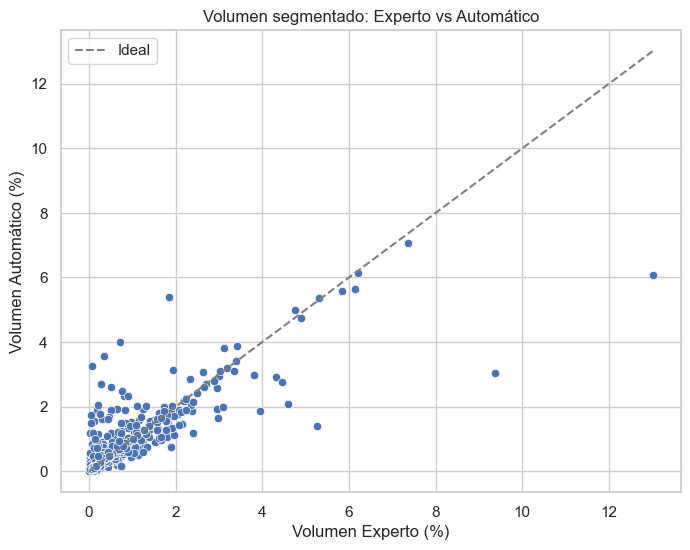

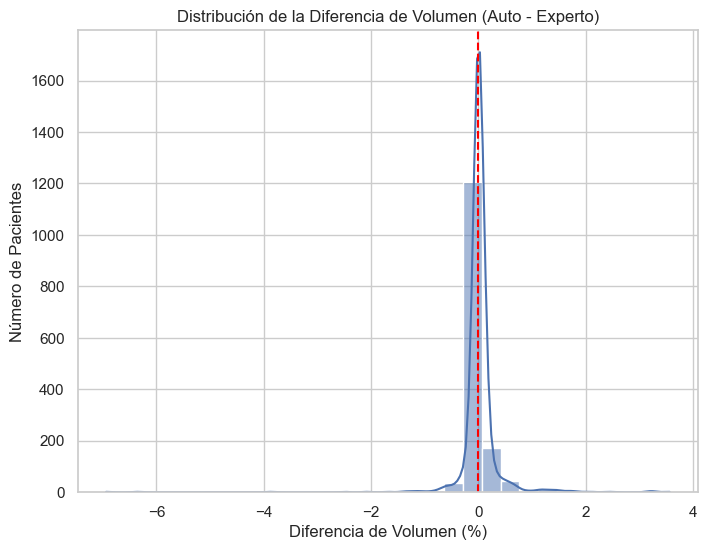

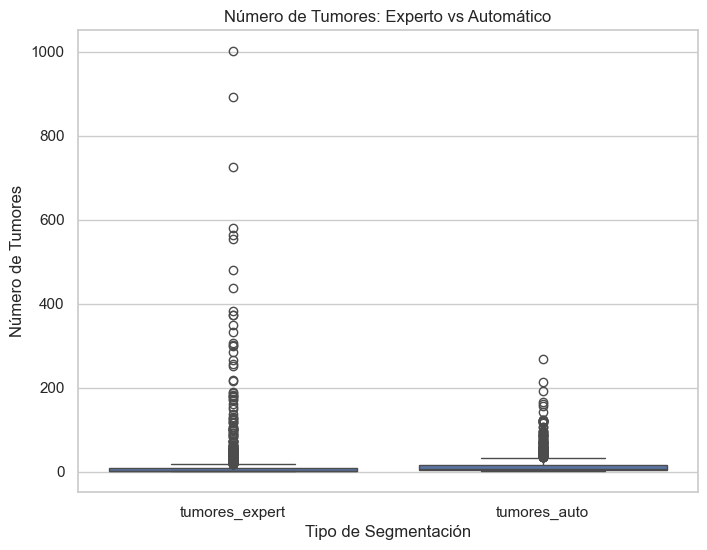

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar CSV con los datos comparados
df_comparado = pd.read_csv('comparacion_expert_auto.csv')

# Estilo de visualizaci√≥n
sns.set(style="whitegrid")

# 1. SCATTER: Volumen experto vs autom√°tico
plt.figure(figsize=(8,6))
sns.scatterplot(x='volumen_expert', y='volumen_auto', data=df_comparado)
plt.plot([0, max(df_comparado['volumen_expert'].max(), df_comparado['volumen_auto'].max())],
         [0, max(df_comparado['volumen_expert'].max(), df_comparado['volumen_auto'].max())],
         linestyle='--', color='gray', label='Ideal')
plt.title('Volumen segmentado: Experto vs Autom√°tico')
plt.xlabel('Volumen Experto (%)')
plt.ylabel('Volumen Autom√°tico (%)')
plt.legend()
plt.show()

# 2. HISTOGRAMA: Diferencia de volumen
plt.figure(figsize=(8,6))
sns.histplot(df_comparado['dif_volumen'], bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribuci√≥n de la Diferencia de Volumen (Auto - Experto)')
plt.xlabel('Diferencia de Volumen (%)')
plt.ylabel('N√∫mero de Pacientes')
plt.show()

# 3. BOXPLOT: N√∫mero de tumores
plt.figure(figsize=(8,6))
df_melt = df_comparado.melt(id_vars='paciente', value_vars=['tumores_expert', 'tumores_auto'],
                            var_name='tipo_segmentacion', value_name='num_tumores')
sns.boxplot(x='tipo_segmentacion', y='num_tumores', data=df_melt)
plt.title('N√∫mero de Tumores: Experto vs Autom√°tico')
plt.xlabel('Tipo de Segmentaci√≥n')
plt.ylabel('N√∫mero de Tumores')
plt.show()


In [ ]:
import pandas as pd

# Cargar el CSV con los datos comparados
df = pd.read_csv('comparacion_expert_auto.csv')

# Funci√≥n para clasificar visibilidad
def clasificar_visibilidad(n_tumores, volumen):
    if volumen > 0.05 and n_tumores == 1:
        return 'Alta'
    elif volumen < 0.01 or n_tumores > 3:
        return 'Baja'
    else:
        return 'Media'

# Aplicar clasificaci√≥n a ambas segmentaciones
df['visibilidad_expert'] = df.apply(lambda row: clasificar_visibilidad(row['tumores_expert'], row['volumen_expert']), axis=1)
df['visibilidad_auto'] = df.apply(lambda row: clasificar_visibilidad(row['tumores_auto'], row['volumen_auto']), axis=1)

# Guardar nuevo CSV con visibilidad a√±adida
output_path = 'comparacion_expert_auto_visibilidad.csv'
df.to_csv(output_path, index=False)
print(df.head())




   paciente  tumores_expert  volumen_expert  tumores_auto  volumen_auto  \
0  duke_001               3        0.023284             3      0.025193   
1  duke_002               3        0.004599             1      0.005384   
2  duke_005              47        0.061568            12      0.059930   
3  duke_009              13        0.026099            23      0.027013   
4  duke_010              21        0.091636             9      0.086703   

   dif_tumores  dif_volumen visibilidad_expert visibilidad_auto  
0            0     0.001909              Media            Media  
1           -2     0.000784               Baja             Baja  
2          -35    -0.001638               Baja             Baja  
3           10     0.000915               Baja             Baja  
4          -12    -0.004933               Baja             Baja  


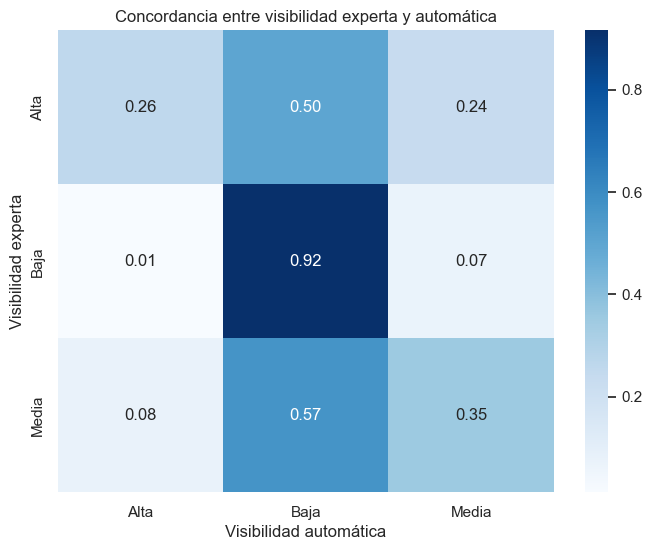

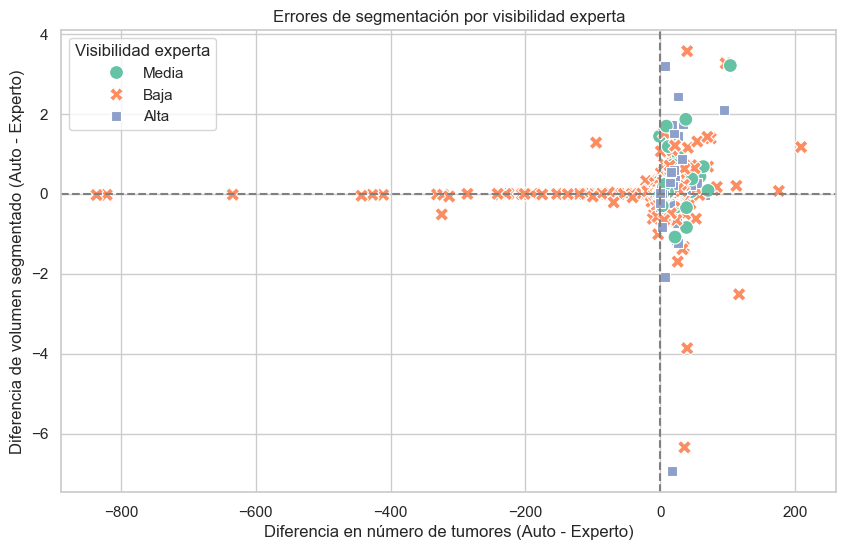

  visibilidad_expert  dif_tumores  dif_volumen
0               Alta       5.3974       0.0287
1               Baja     -13.5386       0.0093
2              Media       5.8685       0.0438


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Configurar estilo visual
sns.set(style="whitegrid")

# 1. Heatmap de concordancia entre visibilidad experta y autom√°tica
conf_matrix = pd.crosstab(df['visibilidad_expert'], df['visibilidad_auto'], normalize='index')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Concordancia entre visibilidad experta y autom√°tica')
plt.xlabel('Visibilidad autom√°tica')
plt.ylabel('Visibilidad experta')
plt.show()

# 2. Scatter plot: diferencia de volumen vs diferencia de tumores, coloreado por visibilidad experta
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='dif_tumores', y='dif_volumen', hue='visibilidad_expert', style='visibilidad_expert', palette='Set2', s=100)
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.title('Errores de segmentaci√≥n por visibilidad experta')
plt.xlabel('Diferencia en n√∫mero de tumores (Auto - Experto)')
plt.ylabel('Diferencia de volumen segmentado (Auto - Experto)')
plt.legend(title='Visibilidad experta')
plt.grid(True)
plt.show()

# 3. Tabla resumen con medias por visibilidad experta
resumen = df.groupby('visibilidad_expert')[['dif_tumores', 'dif_volumen']].mean().round(4)
resumen.reset_index(inplace=True)
print(resumen)


## üìä An√°lisis de Segmentaciones seg√∫n Visibilidad Tumoral

En este an√°lisis se estudia **c√≥mo var√≠an los errores de la segmentaci√≥n autom√°tica frente a la experta**, dependiendo del nivel de **visibilidad del tumor**.

La **visibilidad** se ha calculado tanto para la segmentaci√≥n experta como para la autom√°tica, bas√°ndose en:
- El **volumen tumoral segmentado** (en porcentaje del volumen total).
- El **n√∫mero de componentes conectadas** (tumores separados).

Se han definido tres niveles de visibilidad:
- **Alta**: Tumor √∫nico y de gran tama√±o.
- **Media**: Intermedia en n√∫mero de tumores y volumen.
- **Baja**: M√∫ltiples tumores o volumen muy peque√±o.

> En este an√°lisis, tomamos la **visibilidad experta** como referencia para evaluar la calidad de las segmentaciones autom√°ticas. Adem√°s, comparamos la clasificaci√≥n de visibilidad entre ambos m√©todos para estudiar la concordancia.

---

###  1. Concordancia entre visibilidad experta y autom√°tica

- La matriz de confusi√≥n muestra c√≥mo se alinean las clasificaciones de visibilidad de ambos m√©todos.
- La **concordancia es mayor en los casos de baja visibilidad** (92%), lo cual sugiere que el modelo identifica bien estos casos.
- En cambio, para los **tumores de alta visibilidad**, el modelo autom√°tico tiende a clasificarlos err√≥neamente como "media" o incluso "baja", lo cual indica un **sesgo hacia la simplificaci√≥n**.

---

### 2. Errores de segmentaci√≥n seg√∫n visibilidad experta

- Cada punto representa un paciente, mostrando la diferencia entre modelo autom√°tico y experto en:
  - Eje X: n√∫mero de tumores.
  - Eje Y: volumen tumoral.
- Los errores se agrupan seg√∫n la visibilidad experta:
  - **Baja visibilidad**: Mayor dispersi√≥n y errores m√°s extremos.
  - **Media/Alta visibilidad**: Mejores resultados, errores m√°s controlados.

---

### 3. Resumen de errores medios por visibilidad experta

| Visibilidad | ‚àÜ Tumores (Auto - Expert) | ‚àÜ Volumen (%) |
|-------------|----------------------------|----------------|
| Alta        | **+5.40** ‚Üí sobresegmentaci√≥n | **+0.0287** |
| Media       | **+5.87** ‚Üí sobresegmentaci√≥n | **+0.0438** |
| Baja        | **-13.54** ‚Üí subsegmentaci√≥n | **+0.0093** |

- El modelo **subsegmenta tumores** en casos de baja visibilidad (omite focos).
- En tumores de media y alta visibilidad, tiende a **sobresegmentar**, detectando m√°s regiones o extendiendo el volumen.

---

### ‚úÖ Conclusi√≥n

> El modelo autom√°tico muestra **diferencias claras en rendimiento seg√∫n la visibilidad del tumor**. Los casos dif√≠ciles (baja visibilidad) siguen siendo un reto, lo cual sugiere la necesidad de:
>
> - Mejorar la sensibilidad del modelo.
> - Incluir mecanismos de control de calidad.
> - Aplicar estrategias espec√≠ficas para tumores peque√±os o multifocales.



# Embedding

In [ ]:
import os
import torch
import numpy as np
from monai.networks.nets import resnet
from monai.transforms import (
    Compose, LoadImage, ScaleIntensity,
    Resize, EnsureChannelFirst, ToTensor
)

def extraer_embedding(ruta_imagen, modelo=None, tama√±o_destino=(96, 96, 96), device=None):
    """
    Extrae embeddings a partir de im√°genes m√©dicas 3D utilizando ResNet3D de MONAI.
    
    Args:
        ruta_imagen (str): Ruta al archivo de imagen 3D (.nii o .nii.gz)
        modelo (torch.nn.Module, optional): Modelo CNN. Si no se pasa, se crea uno nuevo.
        tama√±o_destino (tuple, optional): Tama√±o final de la imagen (ej. (96,96,96)).
        device (torch.device, optional): GPU o CPU.
    
    Returns:
        np.ndarray: Vector de embedding.
    """
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    if not os.path.exists(ruta_imagen):
        raise FileNotFoundError(f"No se encontr√≥ la imagen: {ruta_imagen}")

    # Transformaciones MONAI
    transforms = Compose([
        LoadImage(image_only=True),
        EnsureChannelFirst(),
        ScaleIntensity(minv=0.0, maxv=1.0),
        Resize(spatial_size=tama√±o_destino, mode='trilinear', align_corners=True),
        ToTensor()
    ])

    # Cargar y transformar imagen
    img_tensor = transforms(ruta_imagen).unsqueeze(0).to(device)  # A√±ade dimensi√≥n batch

    # Crear modelo si no se pas√≥ uno
    if modelo is None:
        modelo = resnet.resnet10(
            spatial_dims=3,
            n_input_channels=1,
            pretrained=False,
            num_classes=2
        )
        modelo.fc = torch.nn.Identity()
        modelo = modelo.to(device)

    modelo.eval()
    with torch.no_grad():
        embedding = modelo(img_tensor)
        embedding = embedding.cpu().numpy().flatten()

    return embedding


def procesar_directorio(directorio, modelo=None, tama√±o_destino=(96, 96, 96)):
    """
    Procesa todas las im√°genes .nii/.nii.gz en un directorio y extrae embeddings.

    Args:
        directorio (str): Ruta del directorio con im√°genes.
        modelo (torch.nn.Module): Modelo a usar (opcional).
        tama√±o_destino (tuple): Tama√±o est√°ndar para las im√°genes.

    Returns:
        dict: {nombre_archivo: embedding}
    """
    resultados = {}

    if modelo is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        modelo = resnet.resnet10(
            spatial_dims=3,
            n_input_channels=1,
            pretrained=False,
            num_classes=2
        )
        modelo.fc = torch.nn.Identity()
        modelo = modelo.to(device)

    for archivo in os.listdir(directorio):
        if archivo.endswith(('.nii', '.nii.gz')):
            ruta = os.path.join(directorio, archivo)
            try:
                embedding = extraer_embedding(ruta, modelo=modelo, tama√±o_destino=tama√±o_destino)
                resultados[archivo] = embedding
                print(f"Procesado: {archivo} ‚Üí embedding shape: {embedding.shape}")
            except Exception as e:
                print(f"Error al procesar {archivo}: {e}")

    return resultados


def guardar_embeddings(embeddings, ruta_salida):
    """
    Guarda los embeddings en un archivo .npy.

    Args:
        embeddings (dict): Diccionario {nombre_archivo: embedding}
        ruta_salida (str): Ruta para guardar el archivo .npy
    """
    np.save(ruta_salida, embeddings)
    print(f"üíæ Embeddings guardados en {ruta_salida}")


# === EJEMPLO DE USO ===
if __name__ == "__main__":
    # Procesar una imagen
    ruta_img = "datos/images/duke_001_0000.nii.gz"
    emb = extraer_embedding(ruta_img)
    print(f"Embedding shape: {emb.shape}")
    print("Embedding vector:", emb)
    
    # Procesar todas las im√°genes en un directorio
    # dir_path = "datos/imagenes"
    # embeddings = procesar_directorio(dir_path)
    # guardar_embeddings(embeddings, "resultados/embeddings.npy")


Embedding shape: (512,)
Embedding vector: [7.54118257e-04 1.28246412e-01 6.48979545e-02 3.91372107e-02
 1.28167635e-02 2.06378773e-02 8.23651850e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.27915870e-02 2.49493215e-02
 8.33834801e-03 4.36384678e-02 2.60538422e-03 1.22300899e-02
 7.92536214e-02 2.82259304e-02 1.03040166e-01 1.74808092e-02
 0.00000000e+00 1.19025270e-02 1.58597459e-03 2.73599736e-02
 6.83434382e-02 1.03986405e-01 6.81843013e-02 1.93164276e-04
 1.07946306e-01 1.71572372e-01 4.77751791e-02 2.98115599e-04
 2.04548743e-02 2.49761660e-02 5.79494201e-02 1.09271728e-03
 4.90755134e-04 1.53070912e-01 1.66216925e-01 1.83873903e-03
 9.70317274e-02 0.00000000e+00 4.84956690e-05 5.45393967e-04
 0.00000000e+00 2.17468776e-02 2.82978211e-02 2.54874621e-02
 2.73985555e-03 1.16461135e-01 8.34138971e-03 1.30785480e-02
 5.29978331e-03 0.00000000e+00 7.11484812e-03 0.00000000e+00
 1.89829690e-04 1.58907965e-01 8.32508728e-02 1.76610246e-01
 4.47120816e-02 8.44431967e-02 1.25950873e-

In [ ]:
import os
import torch
import numpy as np
import pandas as pd
from monai.networks.nets import resnet
from monai.transforms import (
    Compose, LoadImage, ScaleIntensity,
    Resize, EnsureChannelFirst, ToTensor
)

# -------------------
# FUNCIONES
# -------------------

def extraer_embedding(ruta_imagen, modelo=None, tama√±o_destino=(96, 96, 96), device=None):
    """
    Extrae embeddings de una imagen 3D usando ResNet3D.
    """
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    if not os.path.exists(ruta_imagen):
        raise FileNotFoundError(f"No se encontr√≥ la imagen: {ruta_imagen}")

    transforms = Compose([
        LoadImage(image_only=True),
        EnsureChannelFirst(),
        ScaleIntensity(minv=0.0, maxv=1.0),
        Resize(spatial_size=tama√±o_destino, mode='trilinear', align_corners=True),
        ToTensor()
    ])

    img_tensor = transforms(ruta_imagen).unsqueeze(0).to(device)  # [B, C, D, H, W]

    if modelo is None:
        modelo = resnet.resnet10(
            spatial_dims=3,
            n_input_channels=1,
            pretrained=False,
            num_classes=2
        )
        modelo.fc = torch.nn.Identity()
        modelo = modelo.to(device)

    modelo.eval()
    with torch.no_grad():
        embedding = modelo(img_tensor)
        embedding = embedding.cpu().numpy().flatten()

    return embedding


def procesar_directorio(directorio, modelo=None, tama√±o_destino=(96, 96, 96)):
    """
    Procesa todas las im√°genes en un directorio y extrae sus embeddings.
    """
    resultados = {}

    if modelo is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        modelo = resnet.resnet10(
            spatial_dims=3,
            n_input_channels=1,
            pretrained=False,
            num_classes=2
        )
        modelo.fc = torch.nn.Identity()
        modelo = modelo.to(device)

    for archivo in os.listdir(directorio):
        if archivo.endswith(('.nii', '.nii.gz')):
            ruta = os.path.join(directorio, archivo)
            try:
                embedding = extraer_embedding(ruta, modelo=modelo, tama√±o_destino=tama√±o_destino)
                resultados[archivo] = embedding
                print(f"‚úÖ Procesado: {archivo} ‚Üí embedding shape: {embedding.shape}")
            except Exception as e:
                print(f"‚ùå Error al procesar {archivo}: {e}")

    return resultados


def guardar_embeddings_csv(embeddings_dict, ruta_csv):
    """
    Guarda los embeddings en un archivo .csv.
    """
    df = pd.DataFrame.from_dict(embeddings_dict, orient='index')
    df.index.name = 'archivo'
    os.makedirs(os.path.dirname(ruta_csv), exist_ok=True)
    df.to_csv(ruta_csv)
    print(f"üíæ Embeddings guardados en {ruta_csv}")


# -------------------
# USO
# -------------------

if __name__ == "__main__":
    # Ruta a tu carpeta de im√°genes
    directorio = "datos/image" \
    "s"

    # Extraer embeddings
    embeddings = procesar_directorio(directorio)

    # Guardar en CSV
    guardar_embeddings_csv(embeddings, "resultados/embeddings.csv")


‚úÖ Procesado: duke_001_0000.nii.gz ‚Üí embedding shape: (512,)
‚úÖ Procesado: duke_001_0001.nii.gz ‚Üí embedding shape: (512,)
‚úÖ Procesado: duke_001_0002.nii.gz ‚Üí embedding shape: (512,)
‚úÖ Procesado: duke_001_0003.nii.gz ‚Üí embedding shape: (512,)
‚úÖ Procesado: duke_001_0004.nii.gz ‚Üí embedding shape: (512,)
‚úÖ Procesado: duke_002_0000.nii.gz ‚Üí embedding shape: (512,)
‚úÖ Procesado: duke_002_0001.nii.gz ‚Üí embedding shape: (512,)
‚úÖ Procesado: duke_002_0002.nii.gz ‚Üí embedding shape: (512,)
‚úÖ Procesado: duke_002_0003.nii.gz ‚Üí embedding shape: (512,)
‚úÖ Procesado: duke_005_0000.nii.gz ‚Üí embedding shape: (512,)
‚úÖ Procesado: duke_005_0001.nii.gz ‚Üí embedding shape: (512,)
‚úÖ Procesado: duke_005_0002.nii.gz ‚Üí embedding shape: (512,)
‚úÖ Procesado: duke_005_0003.nii.gz ‚Üí embedding shape: (512,)
‚úÖ Procesado: duke_009_0000.nii.gz ‚Üí embedding shape: (512,)
‚úÖ Procesado: duke_009_0001.nii.gz ‚Üí embedding shape: (512,)
‚úÖ Procesado: duke_009_0002.nii.gz ‚Üí 